<a href="https://colab.research.google.com/github/felipequinto/Series_temporais_TCC/blob/main/AnalysisStep2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf
from keras import backend as K
import keras

In [ ]:
def fix_seeds():
  seed = 10
  os.environ['PYTHONHASHSEED']=str(seed)
  np.random.seed(seed)
  random.seed(seed)
  tf.random.set_seed(seed)
  keras.utils.set_random_seed(seed)

In [ ]:
df = pd.read_excel("df.xlsx")
df.head()

,Ano,Mês,Total Mês,311110101,311110103,311110105,311110106,311110107,311110108,311110109,...,3322101AC,3322101AD,3322101AE,3322101AF,3322101AG,3322101AL,3322101AM,3322101AN,3322101AO,3322101AP
0,2018,1,5.374127e+07,5906414.43,50696.18,3168486.01,6458.9,583325.63,82950.58,881.31,...,643303.97,0.0,42021.00,397621.11,436.13,18669.00,12828.98,0.00,0.0,0.0
1,2018,2,6.643437e+07,6315178.74,60144.70,730433.51,9227.0,559751.51,30982.78,2487.57,...,1321919.90,0.0,221.00,3049390.18,627.19,0.00,26629.37,0.00,0.0,0.0
2,2018,3,9.245592e+07,6328579.51,59968.33,978174.27,9227.0,625780.82,53689.57,3149.16,...,2133666.55,0.0,90120.00,1988535.08,100.80,23336.04,13739.47,8878.77,0.0,0.0
3,2018,4,1.716713e+08,6543779.23,60494.86,853728.88,0.0,598860.32,35190.27,3244.84,...,567036.15,0.0,1285864.36,6125397.66,5048.27,1555.68,65466.50,0.00,0.0,0.0
4,2018,5,6.793400e+07,7106888.05,63273.68,1057232.06,0.0,701784.14,40353.27,3235.61,...,774500.00,0.0,69562.00,8107928.05,6762.80,1555.68,0.00,0.00,0.0,0.0


In [ ]:
df.sum(axis=0).sort_values(ascending=False)

,0
Total Mês,4.020474e+09
331110106,6.341993e+08
332210176,4.892301e+08
332210153,4.772827e+08
311110101,2.585980e+08
...,...
332210164,3.034700e+02
Mês,1.620000e+02
332210187,9.394000e+01
3322101A4,4.460000e+01


In [ ]:
df_step2 = df[['Ano', 'Mês', 'Total Mês', 331110106, 399110201, 332210176, 311110101]]
df_step2.head()

,Ano,Mês,Total Mês,331110106,399110201,332210176,311110101
0,2018,1,5.374127e+07,69740.03,1194.66,5060429.94,5906414.43
1,2018,2,6.643437e+07,10234154.56,972.16,2531183.08,6315178.74
2,2018,3,9.245592e+07,13623418.36,0.00,31817106.80,6328579.51
3,2018,4,1.716713e+08,22121836.35,0.00,69852642.22,6543779.23
4,2018,5,6.793400e+07,5380719.26,77.23,2.92,7106888.05


### Organizando os dados para entrada do modelo

In [ ]:
np.array(df_step2.iloc[0:,2:]).shape

(27, 5)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

fix_seeds()
scaler = MinMaxScaler()
all_data_scaled = scaler.fit_transform(np.array(df_step2.iloc[0:,2:]))
# all_data_scaled = all_data_scaled.squeeze(-1)

In [ ]:
all_data_scaled.shape

(27, 5)

In [ ]:
all_data_scaled[:2], all_data_scaled[-1]

(array([[0.00000000e+00, 0.00000000e+00, 1.30653617e-05, 6.04291294e-02,
         0.00000000e+00],
        [3.75155741e-02, 8.97691199e-02, 1.06319974e-05, 3.02261080e-02,
         1.72604613e-02]]),
 array([0.21639768, 0.2518052 , 0.0023605 , 0.14858124, 0.20480645]))

In [ ]:
dados_interesse2 = all_data_scaled

window = 5
dataSize = len(dados_interesse2)
X = []
y = []
for i in range(window, dataSize):
    X.append(dados_interesse2[i-window:i,:])
    y.append(dados_interesse2[i, 0])
X, y = np.array(X), np.array(y)
X.shape, y.shape

((22, 5, 5), (22,))

###Separação treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

fix_seeds()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15, 5, 5), (7, 5, 5), (15,), (7,))

In [ ]:
X_train[0], X_test[0]

(array([[1.00000000e+00, 1.84569924e-01, 9.09705141e-04, 1.23061240e-02,
         1.85704440e-01],
        [3.09319017e-01, 1.47819713e-01, 6.91085706e-03, 6.32232258e-01,
         1.15841465e-01],
        [2.55927216e-01, 1.85677114e-01, 2.12112811e-06, 1.71446620e-01,
         1.45093744e-01],
        [2.99685884e-01, 2.45384052e-01, 2.10953545e-06, 3.91298097e-02,
         1.43269353e-01],
        [4.37731912e-01, 2.79003637e-01, 1.00000000e+00, 4.51692951e-02,
         1.56182539e-01]]),
 array([[0.00000000e+00, 0.00000000e+00, 1.30653617e-05, 6.04291294e-02,
         0.00000000e+00],
        [3.75155741e-02, 8.97691199e-02, 1.06319974e-05, 3.02261080e-02,
         1.72604613e-02],
        [1.14424589e-01, 1.19702101e-01, 0.00000000e+00, 3.79944198e-01,
         1.78263216e-02],
        [3.48552590e-01, 1.94757630e-01, 0.00000000e+00, 8.34145847e-01,
         2.69133342e-02],
        [4.19478679e-02, 4.69050067e-02, 8.44623479e-07, 0.00000000e+00,
         5.06911391e-02]]))

### Normalização

In [ ]:
X_train_scaled = X_train
X_test_scaled = X_test
y_train_scaled = y_train
y_test_scaled = y_test

### Modelo

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization, Conv1D, Flatten

In [ ]:
X_train_scaled_reshaped = X_train_scaled
X_test_scaled_reshaped = X_test_scaled
X_train_scaled_reshaped.shape

(15, 5, 5)

In [ ]:
# Inicializar a RNN
fix_seeds()
regressor = Sequential()

# Adicionar a primeira camada LSTM e Dropout
regressor.add(LSTM(units=2, return_sequences=True, input_shape=(X_train_scaled_reshaped.shape[1], X_train_scaled_reshaped.shape[2])))
regressor.add(BatchNormalization())
# regressor.add(LSTM(units=2, return_sequences=True))

regressor.add(Conv1D(filters=1, kernel_size=4, strides=1, padding="same", activation="relu"))
# regressor.add(BatchNormalization())
# regressor.add(Dropout(0.2))
regressor.add(Flatten())

# # Adicionar a segunda camada LSTM e Dropout
# regressor.add(LSTM(units=80, return_sequences=True))
# regressor.add(Dropout(0.2))

# Adicionar a terceira camada LSTM e Dropout
# regressor.add(LSTM(units=3))
regressor.add(Dense(units=2))
regressor.add(Dropout(0.2))

# camada de saída
regressor.add(Dense(units=1))

# Compilar a rede
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Visualizar a rede
regressor.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 5, 2)                │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 5, 2)                │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 5, 1)                │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96 (384.00 B)

 Trainable params: 92 (368.00 B)

 Non-trainable params: 4 (16.00 B)

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

ES_callback = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
LR_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

In [ ]:
history = regressor.fit(X_train_scaled_reshaped, y_train_scaled,
                        validation_data=(X_test_scaled_reshaped, y_test_scaled),
                        epochs=200, batch_size=2, callbacks=[ES_callback,LR_callback])

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 1.1577 - val_loss: 0.0824 - learning_rate: 0.0010
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6600 - val_loss: 0.0799 - learning_rate: 0.0010
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9670 - val_loss: 0.0783 - learning_rate: 0.0010
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8617 - val_loss: 0.0777 - learning_rate: 0.0010
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3903 - val_loss: 0.0770 - learning_rate: 0.0010
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4512 - val_loss: 0.0750 - learning_rate: 0.0010
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4611 - val_loss: 0.0723 - learning_rate: 0.0010
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5016 - val_loss: 0.0686 - learning_rate: 0.0010
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3740 - val_loss: 0.0652 - learning_rate: 0.0010
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━

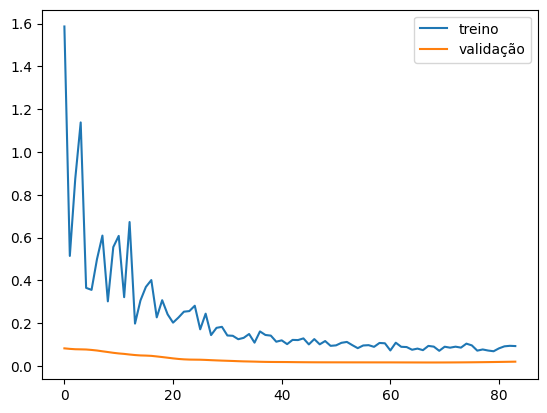

In [ ]:
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.legend();

In [ ]:
X_test_scaled_reshaped.shape

(7, 5, 5)

In [ ]:
y_pred = regressor.predict(X_test_scaled_reshaped)
# y_pred = np.squeeze(y_pred, -1)
# y_pred = scaler_y.inverse_transform(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


In [ ]:
y_pred.shape

(7, 1)

In [ ]:
np.repeat(y_pred, 5, axis=1) #.shape

array([[0.24628502, 0.24628502, 0.24628502, 0.24628502, 0.24628502],
       [0.2569529 , 0.2569529 , 0.2569529 , 0.2569529 , 0.2569529 ],
       [0.28110215, 0.28110215, 0.28110215, 0.28110215, 0.28110215],
       [0.24226946, 0.24226946, 0.24226946, 0.24226946, 0.24226946],
       [0.24655366, 0.24655366, 0.24655366, 0.24655366, 0.24655366],
       [0.24233404, 0.24233404, 0.24233404, 0.24233404, 0.24233404],
       [0.29160598, 0.29160598, 0.29160598, 0.29160598, 0.29160598]],
      dtype=float32)

In [ ]:
y_pred_metrics = scaler.inverse_transform(np.repeat(y_pred, 5, axis=1))[:,0]
y_test_metrics = scaler.inverse_transform(np.repeat(np.expand_dims(y_test, axis=-1), 5, axis=1))[:,0]

In [ ]:
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(y_pred_metrics, y_test_metrics))
print('RMSE: ', rmse)

mse = mean_squared_error(y_pred_metrics, y_test_metrics)
print('MSE: ',mse)

mape = np.mean(np.abs((y_test_metrics - y_pred_metrics) / y_test_metrics)) * 100
print('MAPE: ',mape, '%')

from sklearn.metrics import r2_score
r2_score(y_pred_metrics,y_test_metrics)

RMSE:  43315212.48267918
MSE:  1876207632419646.0
MAPE:  34.72613945881707 %


-46.30778914797027

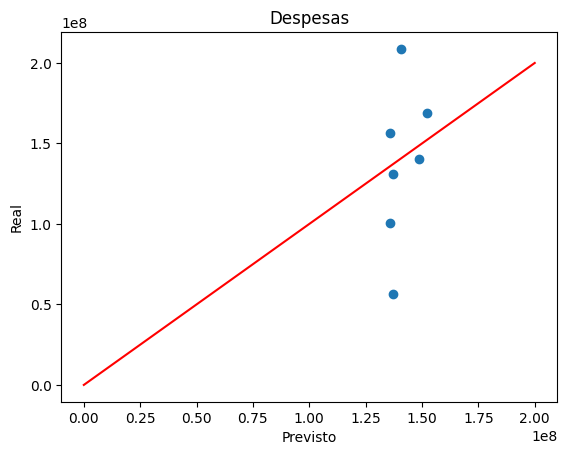

In [ ]:
plt.scatter(y_pred_metrics,y_test_metrics)
plt.ylabel("Real")
plt.xlabel("Previsto")
plt.title("Despesas")

x = [0.0, 2e8]
plt.plot(x, x, color='red');

plt.show()

###Previsao completa

In [ ]:
y_pred_complete = regressor.predict(X)
y_pred_denormalized = scaler.inverse_transform(np.repeat(y_pred_complete, 5, axis=1))[:,0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


In [ ]:
y_denormalized = scaler.inverse_transform(np.repeat(np.expand_dims(y, axis=-1), 5, axis=1))[:,0]

In [ ]:
y_pred_denormalized.shape

(22,)

In [ ]:
y_denormalized.shape

(22,)

In [ ]:
y_pred_denormalized[0], y_denormalized[0]

(137069860.0, 56750962.17)

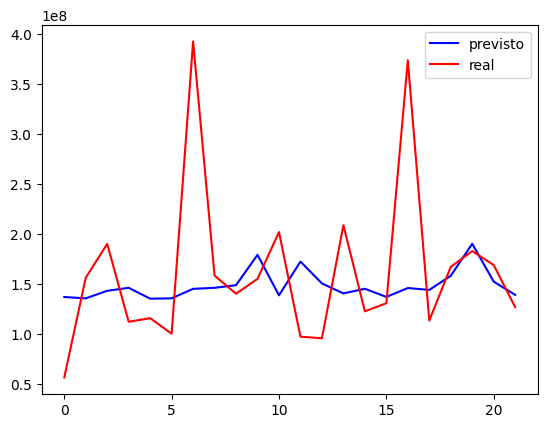

In [ ]:
plt.plot(y_pred_denormalized, color='blue', label='previsto')
plt.plot(y_denormalized, color='red', label='real')
plt.legend()
plt.show()